In [ ]:
"""
الف( عکس کودک را بگیرید و نمودار هیستوگرام آن را نمایش دهید.
ب( روی عکس همسان سازی هیستوگرام )equalization histogram )اعمال کنید و نمودار هیستوگرام عکس همسان شده را
نمایش دهید. مراحل پیاده سازی خود را توضیح دهید.
"""

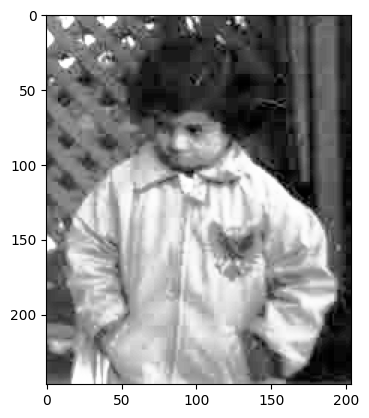

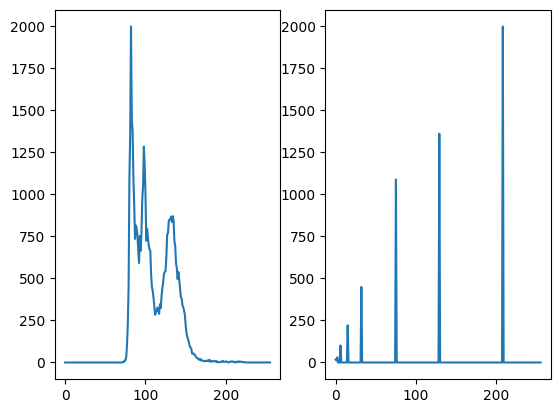

In [8]:
'''
برای بهبود تصویر با کمک همسان سازی هیستوگرام ابتدا باید ساده سازی و بهینه سازی محاسبات
آن را به مقیاس خاکستری میبریم(برای همه تمرینات اینکار  انجام شده است)
سپس هیستوگرام آن را بدست میاوریم که تعداد پیکسل ها در هر سطح روشنایی را نشان میدهد 
تابع توزیع تجمعی آن را محاسبه میکنیم و سپس اعداد ان را نرمال مکینیم تا بین صفر و بیشترین
مقدار هیستوگرام(256)
قرار بگیرند
با کمک درونیابی خطی هیستوگرام همسان سازی میکنیم تا تابع ان کشیده تر شود
و وضوح تصویر بهتر شود
در اخر تصویر بهبود یافته و هیستوگرام اول و دوم را به عنوان خروجی چاپ میکنیم

اعداد اعشاری با ازمایش و خطا بدست امده اند. با اعداد مختلف کنتراست تصویر و نمودار هیستوگرام ان تغییر میکند
'''
import numpy as np
import matplotlib.pyplot as mplp
import matplotlib.image as mpli
#Question 3

#Part A
# read image path
image = mpli.imread('D:/sadeneh/سادنه صادقی-9913012008/Child/child.jpeg')
# تبدیل تصویر به مقیاس خاکستری با روش luminosity
# اعداد اعشاری، وزن های استاندارد برای مقیاس rgb است.
grayImage=np.dot(image[... ,:3] ,[0.1,0.0,0.9])
#محاسبه نمودار هیستوگرام تصویر ورودی
firstHisto,bins=np.histogram(grayImage.flatten(), 256,[0,256])
#محاسبه تابع توزیع تجمعی
cdf=firstHisto.cumsum()
#نرمال کردن تابع تجمعی- بازه اعداد بین صفر و بیشترین مقدار هیستوگرام است.
cdfNormalized=cdf*firstHisto.max() / cdf.max()
#همسان سازی هیستوگرام با کمک درونیابی خطی
secondImage=np.interp(grayImage.flatten(), bins[:-1], cdfNormalized).reshape(grayImage.shape)
#هیستوگرام تصویر بهبود یافته
secondHisto, _ =np.histogram(secondImage.flatten(), 256, [0,256])
mplp.imshow(secondImage, cmap='gray')
mplp.axis('off')
mplp.show()



mplp.subplot(1, 2, 1)
mplp.plot(firstHisto)



mplp.subplot(1, 2, 2)
mplp.plot(secondHisto)
mplp.show()